In [2]:
# Dependencies
from stats import *

In [4]:
# Ages of children and parents at child's party
birthday_party_ages = [6, 5, 6, 6, 35, 42, 34]
print(f"Mode of Birthday Party Ages: {mode(birthday_party_ages)}")

Mode of Birthday Party Ages: (6, 3)


In [3]:
# Test scores from a graduate quantum mechanics midterm
quantum_grades = [63, 63, 98, 13, 58, 13, 8]
print(f"Median of QM Grades: {median(quantum_grades)}")
print(f"Modes of QM Grades: {multi_mode(quantum_grades)}")
print(f"Mean of QM Grades: {mean(quantum_grades)}")

Median of QM Grades: 58
Modes of QM Grades: [(13, 2), (63, 2)]
Mean of QM Grades: 45.142857142857146


In [7]:
# Dependencies
from spread import *

In [9]:
# Ages of students in bootcamp
bootcamp_classroom_ages = [27, 35, 42, 52, 36, 28]
summarize("Bootcamp Ages", bootcamp_classroom_ages)

Summarizing Bootcamp Ages
Variance: 72.55555555555556
Standard Deviation: 8.517954892787092
Z-Scores: [(27, -1.1348576962825065), (35, -0.19566512004870779), (42, 0.6261283841558661), (52, 1.8001191044481146), (36, -0.07826604801948295), (28, -1.0174586242532817)]


In [14]:
# Prices
summarize("Prices", [30, 31, 31, 32, 32, 40, 41, 41, 1000])

Summarizing Prices
Variance: 92039.55555555556
Standard Deviation: 303.3802161571442
Z-Scores: [(30, -0.36917371019996403), (31, -0.36587751635889293), (31, -0.36587751635889293), (32, -0.3625813225178218), (32, -0.3625813225178218), (40, -0.33621177178925293), (41, -0.33291557794818183), (41, -0.33291557794818183), (1000, 2.82813431563901)]


## Quartiles
* Identify the median, upper quartile, and lower quartiles by hand.
* Use code to determine the lower and upper quartiles and be sure to account for both odd and even lengths of a data set.
* Use numpy.percentile to help with the calculations.
* The difference between the upper and lower quartile is called the interquartile range, or IQR.
    * Like the standard deviation, the IQR describes how "spread out" the data set is.
* Calculate the IQR for this list.
* Determine the outliers
    * Lower outliers are points that fall below the result of the equation Q1 - 1.5 * IQR
    * Upper outliers are points that above the result of the equation Q3 + 1.5 * IQR
* Create a box plot of that data.

In [50]:
# Dependencies
import matplotlib.pyplot as plt
from stats import median
import numpy as np

In [51]:
### Data Points
arr = np.array([2.3,10.2,11.2,12.3,14.5,14.6,15.0,15.1,19.0,24.0])
arr

array([ 2.3, 10.2, 11.2, 12.3, 14.5, 14.6, 15. , 15.1, 19. , 24. ])

In [30]:
# Find the median
mid = median(arr)
mid

14.55

In [42]:
# Use numpy to create quartiles
q1 = np.percentile(arr, 25)
q3 = np.percentile(arr,75)
iqr = (q3 - q1)
lower_boundary = q1 - (1.5 * iqr)
upper_boundary = q3 + (1.5 * iqr)
# Print the quartiles
print(f"Q1 is {q1}")
print(f"Q3 is {q3}")
print("interquartile range:", iqr)
print(f'The lower boundary is {lower_boundary}')
print(f'The upper boundary is {upper_boundary}')

Q1 is 11.474999999999998
Q3 is 15.075
interquartile range: 3.6000000000000014
The lower boundary is 6.074999999999996
The upper boundary is 20.475


In [49]:
# Check for any lower outliers
print('Lower outlier: {}, Upper outlier:{}'.format(arr[arr <= lower_boundary],arr[arr >= upper_boundary]))

Lower outlier: [2.3], Upper outlier:[24.]


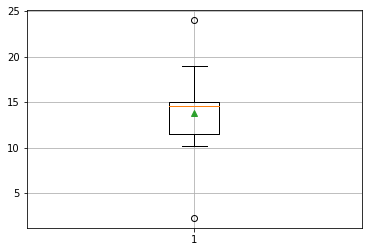

In [50]:
# Create box plot
plt.boxplot(arr, showmeans=True)
plt.grid()
plt.show()

## Standard Error

* With the data provided create a number of samples of house prices.
* Calculate the means for each sample.
* Calculate the standard error for each sample.
* Create a plot displaying the means for each sample, with the standard error as error bars.

In [59]:
# Dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# Read data
housing_data = pd.read_csv("Resources/housing_data.csv", header=None)
housing_data = housing_data.sample(frac=1).reset_index(drop=True)

In [60]:
# Create a bunch of samples, each with div items
div = 20
lim = len(housing_data) // div
samples = [housing_data.iloc[(i * div):(i * div + div), 13]
           for i in range(0, lim)]

In [61]:
# Calculate means
means = [s.mean() for s in samples]
# Calculate standard error on means
sem = [s.sem() for s in samples]

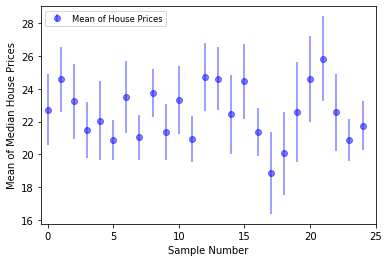

In [66]:
# Plot sample means with error bars
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(means)), means, yerr=sem, fmt="o", color="b",
            alpha=0.5, label="Mean of House Prices")
ax.set_xlim(-0.5, len(means))
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Median House Prices")
plt.legend(loc="upper left", fontsize="small", fancybox=True)
plt.show()

## T-test

* Using the data, read both into a Pandas DataFrame.
* Print the mean height of WBA players (last column in the DataFrame).
* Print the mean height of women sampled.
* Using a T-test, determine if difference in sample height means is significant or not and print a message stating the case.
* Plot an error bar of the height means and include the standard error of the means.
* Using an integer index starting at 0 for the X-axis and the list of means as the Y-axis create a final plot for for mean height.

In [17]:
# Import dependecies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
# Read in data
general_heights = pd.read_csv("Resources/general_heights.csv")
wba_data = pd.read_csv("Resources/wba_data.csv")
wba_heights = wba_data.iloc[:, -1]

In [19]:
# Run the t-test
(t_stat, p) = stats.ttest_ind(general_heights, wba_heights, equal_var=False)
# Report the data
print("The mean height of WBA players is {}.".format(wba_heights.mean()))
print("The mean height of women sampled is {}.".format(general_heights.values.mean()))
print("p is {}.".format(p[0]))
if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

The mean height of WBA players is 72.32.
The mean height of women sampled is 64.68416666666667.
p is 3.147413627696938e-33.
The difference in sample means is significant.


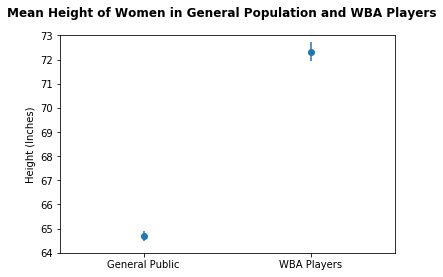

In [21]:
# Plot sample means with error bars
tick_labels = ["General Public", "WBA Players"]
means = [general_heights.mean().values[0], wba_heights.mean()]
x_axis = np.arange(0, len(means))
sem = [general_heights.sem().values[0], wba_heights.sem()]
# Plot mean height of players
fig, ax = plt.subplots()
fig.suptitle("Mean Height of Women in General Population and WBA Players",
             fontsize=12, fontweight="bold")
ax.errorbar(x_axis, means, yerr=sem, fmt="o")
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(64, 73)
ax.set_xticklabels(tick_labels)
ax.set_xticks([0, 1])
ax.set_ylabel("Height (Inches)")
plt.show()

## Fits and Regression
* Read the crime_data.csv provided in the Resources directory.
* Use iloc to isolate the next columns into separate variables for each statistic 
    * year column
    * the total violent crime rate
    * murder rate
    * aggravated assault rate
* Use stats.linregress to perform a linear regression with:
    * the year and violent crime rate columns 
    * the year and murder rate columns
    * the year and aggravated assault rate columns
* Use the information returned by stats.linregress to create an equation for a line describing each of the linear regressions you performed.(End up with three separate lines.)
* Use subplots to create a figure with subplots that share an x-axis
* Use plot to plot each of the lines you created against the year.
* Use the line created for the total violent crime rate to determine what the violent crime rate will be in 2019.

**Recall that stats.linregress returns a slope, called m, and a y-intercept, called b. These let you define a line for each fit by simply writing:** 

**fit = m * year + b, for each linear regression you perform.**

In [39]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
# Load data
crime_data = pd.read_csv("Resources/crime_data.csv")

In [40]:
year = crime_data.loc[:, 'year']
# Grab violent crime rates
violent_crime_rate = crime_data.iloc[:, 3]
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, violent_crime_rate)
vc_fit = vc_slope * year + vc_int
# Grab murder rate
murder_rate = crime_data.iloc[:, 5]
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(year, murder_rate)
m_fit = m_slope * year + m_int
# Grab aggravated assault rate
aggravated_assault_rate = crime_data.iloc[:, 9]
aa_slope, aa_int, aa_r, aa_p, aa_std_err = stats.linregress(year, aggravated_assault_rate)
aa_fit = aa_slope * year + aa_int

Text(0.5, 0, 'Year')

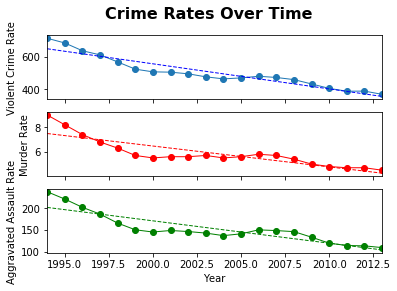

In [48]:
# Plot
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(year), max(year))
ax1.plot(year, violent_crime_rate, linewidth=1, marker="o")
ax1.plot(year, vc_fit, "b--", linewidth=1)
ax1.set_ylabel("Violent Crime Rate")

ax2.plot(year, murder_rate, linewidth=1, marker="o", color="r")
ax2.plot(year, m_fit, "r--", linewidth=1)
ax2.set_ylabel("Murder Rate")

ax3.plot(year, aggravated_assault_rate, linewidth=1, marker="o", color="g")
ax3.plot(year, aa_fit, "g--", linewidth=1)
ax3.set_ylabel("Aggravated Assault Rate")
ax3.set_xlabel("Year")

In [49]:
# Print results and save image
year = 2019
print("The violent crime rate in 2019 will be " + str(vc_slope * year + vc_int))
print("The murder rate in 2019 will be " + str(m_slope * year + m_int))
print("The aggravated assault rate in 2019 will be " + str(aa_slope * year + aa_int))
# plt.savefig("output/18-final-plot.png")

The violent crime rate in 2019 will be 262.2137593984953.
The murder rate in 2019 will be 3.2376691729323284.
The aggravated assault rate in 2019 will be 72.87037593985042.
